In [44]:
#Preprocessing for neural network or other models - steps
#1 import dependencies 
#bring in data
#look for categorical fields that need to be made numeric
#Look at unique value counts for each field
#determine how to bin
#bin/bucket if needed
#create one_hot encoder instance
#fit the one_hot encoder
#use one hot encoder
#merge new fields back to original dataframe
#drop original fields that are now encoded

In [45]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from datetime import datetime
#import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#display options
pd.set_option ('display.max_rows', 10)


In [46]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned_LatLng.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,lat,long,latlng
0,6/7/2017 11:33,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,Redwood City,CA,USA,37.486324,-122.232523,"37.486324, -122.232523"
1,6/10/2017 17:11,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,San Francisco,CA,USA,37.779026,-122.419906,"37.779026, -122.419906"
2,5/8/2021 15:27,Parsons,Software Engineer,79000,2.0,2.0,74000,5000.0,0.0,none,...,0,0,0,0,Aberdeen Proving Ground,MD,USA,39.467972,-76.132435,"39.467972, -76.132435"
3,3/23/2021 6:07,Grubhub,Software Engineer,173000,8.0,4.0,133000,40000.0,0.0,Male,...,1,0,0,0,Abingdon,MD,USA,39.462331,-76.279124,"39.462331, -76.279124"
4,8/12/2020 0:22,Abbott,Hardware Engineer,200000,13.0,2.0,168000,2000.0,30000.0,Male,...,0,0,0,0,Alameda,CA,USA,37.765208,-122.241636,"37.765208, -122.241636"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,11/6/2019 23:33,Analog Devices,Hardware Engineer,94000,3.0,2.0,85000,0.0,9000.0,Male,...,0,0,0,0,Wilmington,MA,USA,42.565439,-71.180219,"42.565439, -71.180219"
44719,12/18/2020 22:58,Analog Devices,Hardware Engineer,100000,4.0,3.0,90000,0.0,10000.0,Male,...,0,0,0,0,Wilmington,MA,USA,42.565439,-71.180219,"42.565439, -71.180219"
44720,6/20/2021 6:19,Analog Devices,Hardware Engineer,147000,15.0,15.0,122000,10000.0,15000.0,Male,...,1,0,0,0,Wilmington,MA,USA,42.565439,-71.180219,"42.565439, -71.180219"
44721,10/31/2018 18:20,Symantec,Software Engineer,220000,25.0,2.0,163000,32000.0,25000.0,none,...,0,0,0,0,Winston Salem,NC,USA,36.095191,-80.243458,"36.095191, -80.243458"


In [47]:
#inspect data to see which fields are strings that need to be converted to numeric
salaries_df.select_dtypes(include=['object']).columns


Index(['timestamp', 'company', 'title', 'gender', 'city', 'state', 'country',
       'latlng'],
      dtype='object')

In [48]:
#convert timestamp to datetime format
salaries_df['timestamp']=pd.to_datetime(salaries_df['timestamp'])
#display options
pd.set_option ('display.max_rows', 10)
salaries_df


,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,lat,long,latlng
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,Redwood City,CA,USA,37.486324,-122.232523,"37.486324, -122.232523"
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,San Francisco,CA,USA,37.779026,-122.419906,"37.779026, -122.419906"
2,2021-05-08 15:27:00,Parsons,Software Engineer,79000,2.0,2.0,74000,5000.0,0.0,none,...,0,0,0,0,Aberdeen Proving Ground,MD,USA,39.467972,-76.132435,"39.467972, -76.132435"
3,2021-03-23 06:07:00,Grubhub,Software Engineer,173000,8.0,4.0,133000,40000.0,0.0,Male,...,1,0,0,0,Abingdon,MD,USA,39.462331,-76.279124,"39.462331, -76.279124"
4,2020-08-12 00:22:00,Abbott,Hardware Engineer,200000,13.0,2.0,168000,2000.0,30000.0,Male,...,0,0,0,0,Alameda,CA,USA,37.765208,-122.241636,"37.765208, -122.241636"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2019-11-06 23:33:00,Analog Devices,Hardware Engineer,94000,3.0,2.0,85000,0.0,9000.0,Male,...,0,0,0,0,Wilmington,MA,USA,42.565439,-71.180219,"42.565439, -71.180219"
44719,2020-12-18 22:58:00,Analog Devices,Hardware Engineer,100000,4.0,3.0,90000,0.0,10000.0,Male,...,0,0,0,0,Wilmington,MA,USA,42.565439,-71.180219,"42.565439, -71.180219"
44720,2021-06-20 06:19:00,Analog Devices,Hardware Engineer,147000,15.0,15.0,122000,10000.0,15000.0,Male,...,1,0,0,0,Wilmington,MA,USA,42.565439,-71.180219,"42.565439, -71.180219"
44721,2018-10-31 18:20:00,Symantec,Software Engineer,220000,25.0,2.0,163000,32000.0,25000.0,none,...,0,0,0,0,Winston Salem,NC,USA,36.095191,-80.243458,"36.095191, -80.243458"


In [49]:
# Determine the number of unique values in each column.
pd.set_option ('display.max_rows', 20)
salaries_df.nunique()
#Fields that need bucketing: company, title, city, state, country

timestamp                  43589
company                     1429
title                         15
totalyearlycompensation      411
yearsofexperience             62
                           ...  
state                         49
country                        1
lat                          702
long                         701
latlng                       703
Length: 29, dtype: int64

In [50]:
#Check company field to see how to bucket it
#display options
pd.set_option ('display.max_rows', 20)
# Print out the company value counts
company_counts = salaries_df.company.value_counts()
print(company_counts)

Amazon               5429
Microsoft            4195
Google               2954
Facebook             1761
Apple                1558
                     ... 
mailchimp               1
Micron technology       1
peloton                 1
Revolut                 1
Fannie mae              1
Name: company, Length: 1429, dtype: int64


<AxesSubplot:ylabel='Density'>

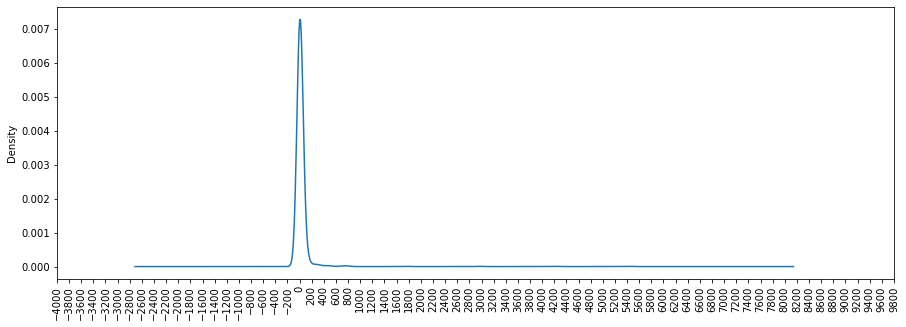

In [51]:
#Visualize the company value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
company_counts.plot.density(xticks=x_ticks, figsize = (15,5), rot = 90)

In [52]:
#Density seems to drop off between 100 and 200 maybe, hard to see
#But this would produce too many buckets
#So bucket all <850 as other

#Determine which values to replace
replace_companies = list(company_counts[company_counts<850].index)

#Replace in DataFrame
for company in replace_companies:
    salaries_df.company = salaries_df.company.replace(company, "Other")

#Check to make sure binning was successful
salaries_df.company.value_counts()

Other        28826
Amazon        5429
Microsoft     4195
Google        2954
Facebook      1761
Apple         1558
Name: company, dtype: int64

In [53]:
#Check title field to see how to bucket it
#display options
pd.set_option ('display.max_rows', 20)
# Print out the company value counts
title_counts = salaries_df.title.value_counts()
print(title_counts)

Software Engineer               29776
Product Manager                  3266
Data Scientist                   1980
Hardware Engineer                1759
Software Engineering Manager     1556
Product Designer                 1224
Technical Program Manager        1088
Management Consultant             748
Solution Architect                730
Business Analyst                  722
Marketing                         573
Mechanical Engineer               438
Recruiter                         391
Human Resources                   283
Sales                             189
Name: title, dtype: int64


<AxesSubplot:ylabel='Density'>

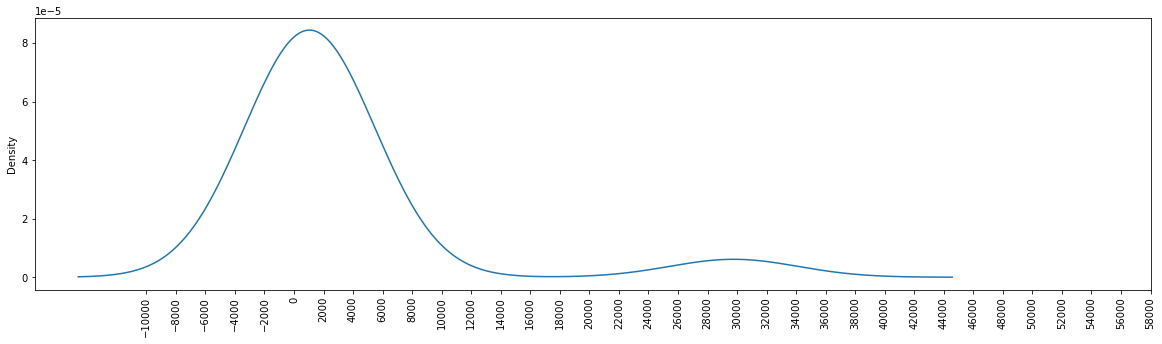

In [54]:
#Visualize the title value counts with a density plot
x_ticks = np.arange(-10000,60000,2000)
title_counts.plot.density(xticks=x_ticks, figsize = (20,5),rot = 90)

In [55]:
#values begine to fall off between 2000 and 4000. Bucket all under 2000

#Determine which values to replace
replace_title = list(title_counts[title_counts<1000].index)

#Replace in DataFrame
for title in replace_title:
    salaries_df.title = salaries_df.title.replace(title, "Other")

#Check to make sure binning was successful
salaries_df.title.value_counts()

Software Engineer               29776
Other                            4074
Product Manager                  3266
Data Scientist                   1980
Hardware Engineer                1759
Software Engineering Manager     1556
Product Designer                 1224
Technical Program Manager        1088
Name: title, dtype: int64

In [56]:
#Check city field to see how to bucket it
#display options
pd.set_option ('display.max_rows', 20)
# Print out the city value counts
city_counts = salaries_df.city.value_counts()
print(city_counts)

Seattle          6945
San Francisco    5146
New York         3798
Redmond          2455
Sunnyvale        1823
                 ... 
Annapolis           1
Kalamazoo           1
Sandisfield         1
Sandy               1
Camas               1
Name: city, Length: 642, dtype: int64


<AxesSubplot:ylabel='Density'>

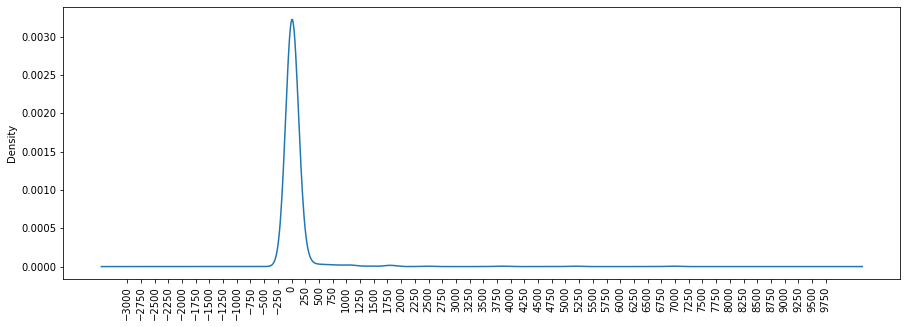

In [57]:
#Visualize the city value counts with a density plot
x_ticks = np.arange(-3000,10000,250)
city_counts.plot.density(xticks=x_ticks, figsize = (15,5),rot = 90)

In [58]:
#Check state field to see how to bucket it
#display options
pd.set_option ('display.max_rows', 20)
# Print out the city value counts
state_counts = salaries_df.state.value_counts()
print(state_counts)

CA    18260
WA    10291
NY     3947
TX     2570
MA     1598
      ...  
ND        5
HI        4
ME        4
MS        3
WY        1
Name: state, Length: 49, dtype: int64


<AxesSubplot:ylabel='Density'>

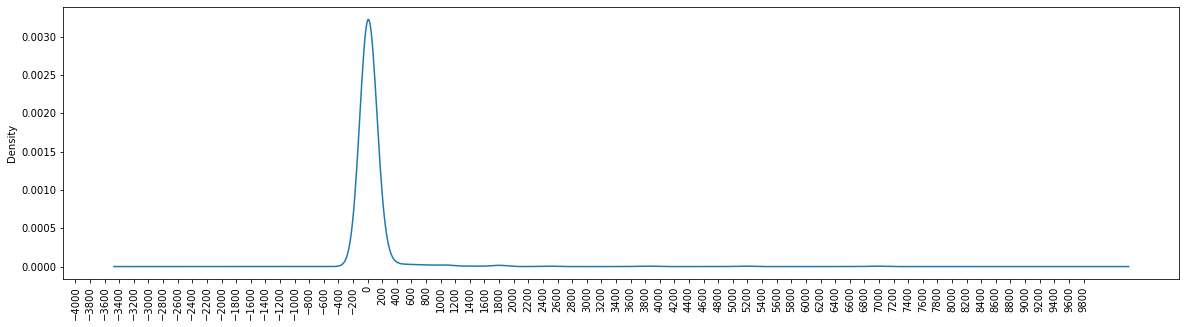

In [59]:
#Visualize the city value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
city_counts.plot.density(xticks=x_ticks, figsize = (20,5), rot = 90)

In [60]:
#Try another approach to regional bucketing: choose 9 largest metro areas as buckets, and then all others in 10th bucket
#California will have >1 so first look at cities in CA
#NYC metro should include folks from NY,NJ,CT who are close to the city
#Seattle metro should include Redmond and Bellevue
#Another group will be DC/MD/VA
#Look at each metro and calculate the distances from the location to the downtown and include folks within 30-50 miles maybe?
#Start by retrieving long,lat for each city
#Use an openweathermap API call to get the long and lat for each city and state combination
#Create a loc group for each of the top 9 regions
#For each region, calculate a field that is distance from the central metro
#Use this distance to decide who to include in that region, be consistent if it makes sense to
#Make sure you don't overlap any regions
#Anyone not in these top 9 groups go into group 10
#Look at the value counts for these groups to see if it seems reasonable


In [61]:
#Look at California metro areas
pd.set_option ('display.max_rows', 20)
salaries_CA = salaries_df.loc[salaries_df['state']=='CA']
#look at city value counts for CA
print(salaries_CA['city'].value_counts())

San Francisco             5146
Sunnyvale                 1822
San Jose                  1793
Mountain View             1789
Cupertino                 1152
                          ... 
Placerville                  1
Claremont                    1
California Hot Springs       1
Pittsburg                    1
Monterey                     1
Name: city, Length: 110, dtype: int64


In [62]:
from geopy import distance
def dist_sf(latlng):
    how_far = distance.distance((37.77493,-122.41942), latlng).miles
    return how_far
def dist_la(latlng):
    how_far = distance.distance((34.052235,-118.243683), latlng).miles
    return how_far
def dist_seattle(latlng):
    how_far = distance.distance((47.60621,-122.332071), latlng).miles
    return how_far
def dist_boston(latlng):
    how_far = distance.distance((42.361145,-71.057083), latlng).miles
    return how_far
def dist_chicago(latlng):
    how_far = distance.distance((41.8781136,-87.623177), latlng).miles
    return how_far
def dist_dallas_ftworth(latlng):
    how_far = max(distance.distance((32.776664,-96.796988), latlng).miles,distance.distance((32.7554883,-97.330766), latlng).miles)
    return how_far
def dist_atlanta(latlng):
    how_far = distance.distance((33.7489954,-84.387984), latlng).miles
    return how_far
def dist_dc(latlng):
    how_far = distance.distance((38.9071923,-77.0368707), latlng).miles
    return how_far
def dist_nyc(latlng):
    how_far = distance.distance((40.73061,-73.935242), latlng).miles
    return how_far
def dist_pitt(latlng):
    how_far = distance.distance((40.440625,-79.995886), latlng).miles
    return how_far
def dist_slc(latlng):
    how_far = distance.distance((40.760779,-111.891047), latlng).miles
    return how_far


In [63]:
#Calculate distances from metro areas
salaries_df['dist_SF'] = salaries_df['latlng'].apply(dist_sf)
salaries_df['dist_LA'] = salaries_df['latlng'].apply(dist_la)
salaries_df['dist_seattle'] = salaries_df['latlng'].apply(dist_seattle)
salaries_df['dist_boston'] = salaries_df['latlng'].apply(dist_boston)
salaries_df['dist_chicago'] = salaries_df['latlng'].apply(dist_chicago)
salaries_df['dist_dallas_ftworth'] = salaries_df['latlng'].apply(dist_dallas_ftworth)
salaries_df['dist_atlanta'] = salaries_df['latlng'].apply(dist_atlanta)
salaries_df['dist_dc'] = salaries_df['latlng'].apply(dist_dc)
salaries_df['dist_nyc'] = salaries_df['latlng'].apply(dist_nyc)
salaries_df['dist_pitt'] = salaries_df['latlng'].apply(dist_pitt)
salaries_df['dist_slc'] = salaries_df['latlng'].apply(dist_slc)


In [64]:
#Count how many are in these metro areas
sf_metro = salaries_df.loc[salaries_df['dist_SF']<=40]
la_metro = salaries_df.loc[salaries_df['dist_LA']<=40]
seattle_metro = salaries_df.loc[salaries_df['dist_seattle']<=40]
boston_metro = salaries_df.loc[salaries_df['dist_boston']<=40]
chicago_metro = salaries_df.loc[salaries_df['dist_chicago']<=40]
dallas_ftworth_metro = salaries_df.loc[salaries_df['dist_dallas_ftworth']<=40]
atlanta_metro = salaries_df.loc[salaries_df['dist_atlanta']<=40]
dc_metro = salaries_df.loc[salaries_df['dist_dc']<=40]
nyc_metro = salaries_df.loc[salaries_df['dist_nyc']<=40]
pitt_metro = salaries_df.loc[salaries_df['dist_pitt']<=40]
slc_metro = salaries_df.loc[salaries_df['dist_slc']<=40]


In [65]:
#Report how man in each region
print(f"There are {sf_metro.count()['lat']} jobs listed from the San Francisco metro area")
print(f"There are {la_metro.count()['lat']} jobs listed from the Los Angeles metro area")
print(f"There are {seattle_metro.count()['lat']} jobs listed from the Seattle metro area")
print(f"There are {boston_metro.count()['lat']} jobs listed from the Boston metro area")
print(f"There are {chicago_metro.count()['lat']} jobs listed from the Chicago metro area")
print(f"There are {dallas_ftworth_metro.count()['lat']} jobs listed from the Dallas Ft. Worth metro area")
print(f"There are {atlanta_metro.count()['lat']} jobs listed from the Atlanta metro area")
print(f"There are {dc_metro.count()['lat']} jobs listed from the Washington, DC metro area")
print(f"There are {nyc_metro.count()['lat']} jobs listed from the NYC metro area")
print(f"There are {pitt_metro.count()['lat']} jobs listed from the Pittsburgh metro area")
print(f"There are {slc_metro.count()['lat']} jobs listed from the Salt Lake City metro area")


There are 14246 jobs listed from the San Francisco metro area
There are 1124 jobs listed from the Los Angeles metro area
There are 10280 jobs listed from the Seattle metro area
There are 1603 jobs listed from the Boston metro area
There are 752 jobs listed from the Chicago metro area
There are 551 jobs listed from the Dallas Ft. Worth metro area
There are 539 jobs listed from the Atlanta metro area
There are 1350 jobs listed from the Washington, DC metro area
There are 4302 jobs listed from the NYC metro area
There are 191 jobs listed from the Pittsburgh metro area
There are 213 jobs listed from the Salt Lake City metro area


In [66]:
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,dist_LA,dist_seattle,dist_boston,dist_chicago,dist_dallas_ftworth,dist_atlanta,dist_dc,dist_nyc,dist_pitt,dist_slc
0,2017-06-07 11:33:00,Other,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,325.947454,698.538438,2698.048530,1856.726543,1471.766205,2131.592943,2436.529264,2572.616836,2262.093448,599.350397
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,347.596774,678.348347,2699.410709,1859.464568,1483.893076,2140.270501,2440.678687,2575.262379,2265.493985,600.403200
2,2021-05-08 15:27:00,Other,Software Engineer,79000,2.0,2.0,74000,5000.0,0.0,none,...,2344.553142,2350.375072,332.224382,625.619813,1269.211434,604.597959,62.080359,145.394641,215.811122,1883.182892
3,2021-03-23 06:07:00,Other,Software Engineer,173000,8.0,4.0,133000,40000.0,0.0,Male,...,2336.760221,2343.724532,338.627432,618.339780,1261.530139,598.209420,55.870031,151.915815,208.557767,1875.679665
4,2020-08-12 00:22:00,Other,Hardware Engineer,200000,13.0,2.0,168000,2000.0,30000.0,Male,...,340.243488,679.302197,2690.830626,1850.603597,1474.087303,2130.607920,2431.575180,2566.425208,2256.516589,591.831191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2019-11-06 23:33:00,Other,Hardware Engineer,94000,3.0,2.0,85000,0.0,9000.0,Male,...,2589.600543,2480.459924,15.441541,843.560314,1576.670110,939.871300,397.586247,190.695529,480.014005,2090.180955
44719,2020-12-18 22:58:00,Other,Hardware Engineer,100000,4.0,3.0,90000,0.0,10000.0,Male,...,2589.600543,2480.459924,15.441541,843.560314,1576.670110,939.871300,397.586247,190.695529,480.014005,2090.180955
44720,2021-06-20 06:19:00,Other,Hardware Engineer,147000,15.0,15.0,122000,10000.0,15000.0,Male,...,2589.600543,2480.459924,15.441541,843.560314,1576.670110,939.871300,397.586247,190.695529,480.014005,2090.180955
44721,2018-10-31 18:20:00,Other,Software Engineer,220000,25.0,2.0,163000,32000.0,25000.0,none,...,2144.523765,2279.753666,654.861049,562.583356,1001.309510,285.489789,261.969664,468.180550,300.020465,1737.234712


In [67]:
#Create region bin values
salaries_df['region'] = 10
salaries_df['region'] = np.where(salaries_df["dist_SF"]<=40,1,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_LA"]<=40,2,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_seattle"]<=40,3,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_boston"]<=40,4,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_chicago"]<=40,5,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_dallas_ftworth"]<=40,6,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_atlanta"]<=40,7,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_dc"]<=40,8,salaries_df['region'])
salaries_df['region'] = np.where(salaries_df["dist_nyc"]<=40,9,salaries_df['region'])


In [68]:
pd.isna(salaries_df['region']).value_counts()

False    44723
Name: region, dtype: int64

In [69]:
#salaries_df.loc[salaries_df['region']==1]
salaries_df['region'].value_counts()

1     14246
3     10280
10     9976
9      4302
4      1603
8      1350
2      1124
5       752
6       551
7       539
Name: region, dtype: int64

In [70]:
salaries_df.loc[salaries_df['region']==10]

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,dist_seattle,dist_boston,dist_chicago,dist_dallas_ftworth,dist_atlanta,dist_dc,dist_nyc,dist_pitt,dist_slc,region
2,2021-05-08 15:27:00,Other,Software Engineer,79000,2.0,2.0,74000,5000.0,0.0,none,...,2350.375072,332.224382,625.619813,1269.211434,604.597959,62.080359,145.394641,215.811122,1883.182892,10
3,2021-03-23 06:07:00,Other,Software Engineer,173000,8.0,4.0,133000,40000.0,0.0,Male,...,2343.724532,338.627432,618.339780,1261.530139,598.209420,55.870031,151.915815,208.557767,1875.679665,10
6,2018-07-10 10:20:00,Other,Software Engineer,86000,7.0,1.0,85000,0.0,2000.0,Male,...,2359.683019,139.224287,712.179940,1454.008814,842.399754,310.385871,132.872905,357.598795,1959.860304,10
7,2021-01-28 10:49:00,Other,Software Engineer,153000,15.0,10.0,139000,0.0,14000.0,Male,...,2359.683019,139.224287,712.179940,1454.008814,842.399754,310.385871,132.872905,357.598795,1959.860304,10
8,2021-04-21 13:14:00,Other,Software Engineer,122000,11.0,4.0,113000,0.0,9000.0,Male,...,2359.683019,139.224287,712.179940,1454.008814,842.399754,310.385871,132.872905,357.598795,1959.860304,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44715,2021-03-12 16:31:00,Google,Software Engineer,145000,2.0,1.0,100000,30000.0,15000.0,none,...,1966.306395,1050.822359,480.849353,553.238103,224.928855,669.084391,869.235330,583.232177,1359.344528,10
44716,2021-06-11 05:50:00,Other,Product Manager,253000,11.0,2.0,178000,75000.0,0.0,Male,...,2281.557470,450.392421,545.184295,1150.570587,487.909483,61.991612,264.484884,154.267914,1791.180100,10
44717,2021-08-04 13:10:00,Other,Data Scientist,105000,2.0,2.0,100000,0.0,5000.0,Male,...,2281.557470,450.392421,545.184295,1150.570587,487.909483,61.991612,264.484884,154.267914,1791.180100,10
44721,2018-10-31 18:20:00,Other,Software Engineer,220000,25.0,2.0,163000,32000.0,25000.0,none,...,2279.753666,654.861049,562.583356,1001.309510,285.489789,261.969664,468.180550,300.020465,1737.234712,10


In [71]:
salaries_df['region'].value_counts()
#no one went into category 100, so all the rows had valid state values

1     14246
3     10280
10     9976
9      4302
4      1603
8      1350
2      1124
5       752
6       551
7       539
Name: region, dtype: int64

In [72]:
#Drop extra location columns prior to one_hot encoding
salaries_df = salaries_df.drop(columns=['city','state','country'])
pd.set_option ('display.max_rows', 10)
salaries_df
#Drop distance and lat/lng columns prior to encoding
salaries_df = salaries_df.drop(columns=['dist_SF','dist_LA','dist_seattle','dist_boston','dist_chicago','dist_dallas_ftworth','dist_atlanta','dist_nyc','dist_dc','dist_pitt','dist_slc', 'lat','long','latlng'])

In [73]:
salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f'))

count     44723.00
mean     143719.73
std       34686.54
min       28000.00
25%      120000.00
50%      143000.00
75%      165000.00
max      247000.00
Name: basesalary, dtype: object

In [74]:
#create a target value from the base salary by bucketing
#The mean is 143,719, the standard deviation is 34687

In [75]:
#Make salary bands of 25000 
#Create a function to calculate salary level and apply to column
def salary_buckets(salary):
    max_level_threshold = 250000
    band_size = 25000
    max_bucket = int(max_level_threshold/band_size)
    if salary < max_level_threshold:
        salary_level = int(salary / band_size)
    else:
        salary_level = max_bucket
    return salary_level

In [76]:
salaries_df['salary_level'] = salaries_df['basesalary'].apply(salary_buckets)
salaries_df.head()

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region,salary_level
0,2017-06-07 11:33:00,Other,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,1,4
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,1,4
2,2021-05-08 15:27:00,Other,Software Engineer,79000,2.0,2.0,74000,5000.0,0.0,none,...,0,0,0,0,0,0,0,0,10,2
3,2021-03-23 06:07:00,Other,Software Engineer,173000,8.0,4.0,133000,40000.0,0.0,Male,...,0,0,0,0,1,0,0,0,10,5
4,2020-08-12 00:22:00,Other,Hardware Engineer,200000,13.0,2.0,168000,2000.0,30000.0,Male,...,0,0,0,1,0,0,0,0,1,6


In [77]:
pd.set_option ('display.max_rows', 20)
print(salaries_df['salary_level'].value_counts())

5    12015
6    11177
4     8828
7     5472
3     3262
8     2485
2      762
9      661
1       61
Name: salary_level, dtype: int64


array([[<AxesSubplot:title={'center':'salary_level'}>]], dtype=object)

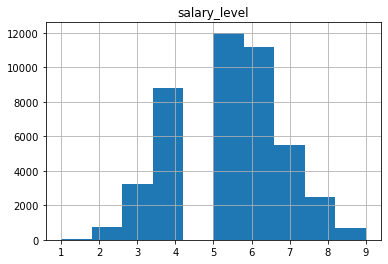

In [78]:
#Look at the distribution of salary level
salaries_df.hist(column = ["salary_level"])

In [79]:
# Generate our categorical variable lists
salaries_cat = salaries_df.dtypes[salaries_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
salaries_df[salaries_cat].nunique()

company    6
title      8
gender     4
dtype: int64

In [80]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(salaries_df[salaries_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(salaries_cat)
encode_df.head()

C:\Users\mgsri\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_Amazon,company_Apple,company_Facebook,company_Google,company_Microsoft,company_Other,title_Data Scientist,title_Hardware Engineer,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
# Merge one-hot encoded features and drop the originals
salaries_df = salaries_df.merge(encode_df,left_index=True, right_index=True)
salaries_df = salaries_df.drop(salaries_cat,1)
salaries_df.head()

C:\Users\mgsri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,2017-06-07 11:33:00,127000,1.5,1.5,107000,20000.0,10000.0,7392,807,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-06-10 17:11:00,100000,5.0,3.0,100000,0.0,0.0,7419,807,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021-05-08 15:27:00,79000,2.0,2.0,74000,5000.0,0.0,19060,512,69008,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021-03-23 06:07:00,173000,8.0,4.0,133000,40000.0,0.0,14910,512,62513,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-08-12 00:22:00,200000,13.0,2.0,168000,2000.0,30000.0,7066,807,36168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
#Make sure we got all the columns, don't see region or salary level
salaries_df.columns.tolist()

['timestamp',
 'totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'cityid',
 'dmaid',
 'rowNumber',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'region',
 'salary_level',
 'company_Amazon',
 'company_Apple',
 'company_Facebook',
 'company_Google',
 'company_Microsoft',
 'company_Other',
 'title_Data Scientist',
 'title_Hardware Engineer',
 'title_Other',
 'title_Product Designer',
 'title_Product Manager',
 'title_Software Engineer',
 'title_Software Engineering Manager',
 'title_Technical Program Manager',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'gender_none']

In [84]:
#Make an output data file to match on with unsupervised before the extra columns are dropped

salaries_df.to_csv("Resources/preprocessed_extra_cols.csv",index=False)

In [174]:
#Remove salary colummns from data since we have encoded it as salary_level
salaries_df = salaries_df.drop(columns=['totalyearlycompensation','basesalary','bonus','stockgrantvalue'])
salaries_df

,timestamp,yearsofexperience,yearsatcompany,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,2017-06-07 11:33:00,1.5,1.5,7392,807,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-06-10 17:11:00,5.0,3.0,7419,807,2,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021-05-08 15:27:00,2.0,2.0,19060,512,69008,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021-03-23 06:07:00,8.0,4.0,14910,512,62513,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-08-12 00:22:00,13.0,2.0,7066,807,36168,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2019-11-06 23:33:00,3.0,2.0,16973,506,17248,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44719,2020-12-18 22:58:00,4.0,3.0,16973,506,51784,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44720,2021-06-20 06:19:00,15.0,15.0,16973,506,74578,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44721,2018-10-31 18:20:00,25.0,2.0,9698,518,3313,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [175]:
#think about what other files ought to be dropped if we are making this into a model where a user enters
#some data. They won't know their city id or dmaid, and those columns encode location which we have already
#done in our region field
#rowNumber should go too, and timestamp, unless we want to make the user enter a data, which might be ok?
#for now, leave timestamp and see if it works with the neural network functions - timestamp bombs standard scaler so drop it

In [176]:
salaries_df = salaries_df.drop(columns=['dmaid','cityid','rowNumber','timestamp'])
salaries_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,1.5,1.5,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,3.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.0,4.0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,13.0,2.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,3.0,2.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44719,4.0,3.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44720,15.0,15.0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44721,25.0,2.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [178]:
#write preprocessed data to output file
salaries_df.to_csv("Resources/US_Salary_Preprocessed_new_regions.csv",index=False)

In [183]:
# Remove annual and base salaries from features data
y = salaries_df.salary_level
X = salaries_df.drop(columns=['salary_level'])


In [184]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [185]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33542, 31)
(11181, 31)
(33542,)
(11181,)


In [186]:
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.409


In [187]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[   1    1    5    3    4    1    0    0    0]
 [   0   21  105   46   14    4    1    0    0]
 [   1   37  352  259  105   43   14    4    1]
 [   2   11  233 1033  614  238   56   16    4]
 [   2    7  105  550 1389  739  150   52   10]
 [   1    2   37  235  748 1266  375  117   13]
 [   0    1   11   62  220  503  403  148   20]
 [   3    0    2   25   87  202  185   99   18]
 [   0    0    0    4   15   44   62   29   11]]


In [188]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.10      0.07      0.08        15
           2       0.26      0.11      0.15       191
           3       0.41      0.43      0.42       816
           4       0.47      0.47      0.47      2207
           5       0.43      0.46      0.45      3004
           6       0.42      0.45      0.43      2794
           7       0.32      0.29      0.31      1368
           8       0.21      0.16      0.18       621
           9       0.14      0.07      0.09       165

    accuracy                           0.41     11181
   macro avg       0.31      0.28      0.29     11181
weighted avg       0.40      0.41      0.40     11181



In [189]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.32254266, 0.20326298, 0.02948544, 0.01959558, 0.01119836,
       0.00249281, 0.00314494, 0.02759786, 0.02204514, 0.00623259,
       0.00579951, 0.00866915, 0.15127436, 0.00983109, 0.00485394,
       0.00831669, 0.00691338, 0.00834119, 0.01433037, 0.00938   ,
       0.00800743, 0.01409411, 0.00761054, 0.01085314, 0.01654461,
       0.00746173, 0.00658794, 0.01578875, 0.0195518 , 0.00326957,
       0.01492235])

In [190]:
X_train.columns

Index(['yearsofexperience', 'yearsatcompany', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'region', 'company_Amazon', 'company_Apple',
       'company_Facebook', 'company_Google', 'company_Microsoft',
       'company_Other', 'title_Data Scientist', 'title_Hardware Engineer',
       'title_Other', 'title_Product Designer', 'title_Product Manager',
       'title_Software Engineer', 'title_Software Engineering Manager',
       'title_Technical Program Manager', 'gender_Female', 'gender_Male',
       'gender_Other', 'gender_none'],
      dtype='object')

In [191]:
columns = X_train.columns

In [192]:
rfGraph = pd.Series(importances, columns)
rfGraph

yearsofexperience                  0.322543
yearsatcompany                     0.203263
Masters_Degree                     0.029485
Bachelors_Degree                   0.019596
Doctorate_Degree                   0.011198
                                     ...   
title_Technical Program Manager    0.006588
gender_Female                      0.015789
gender_Male                        0.019552
gender_Other                       0.003270
gender_none                        0.014922
Length: 31, dtype: float64

Text(0.5, 1.0, 'Random Forest Model Feature Importances')

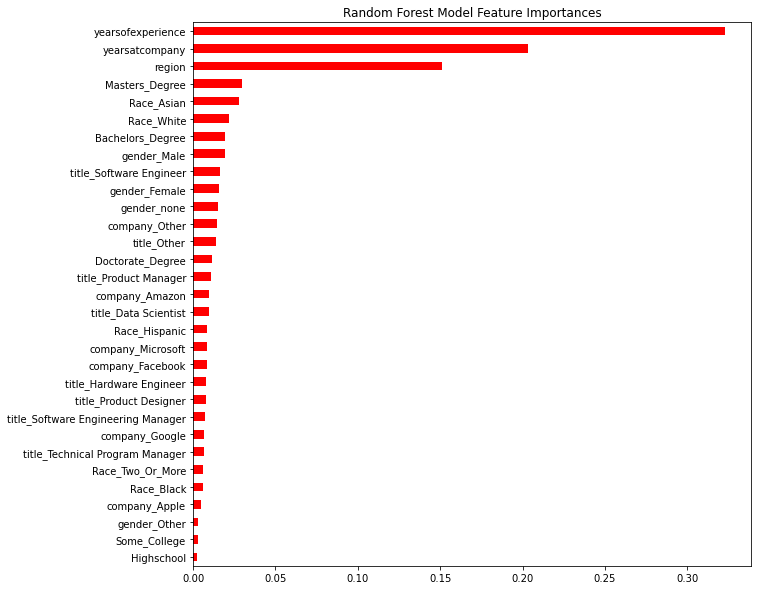

In [194]:
from matplotlib.pyplot import figure
figure(figsize=(10,10))
rfGraph.sort_values().plot.barh(color="red")
plt.title("Random Forest Model Feature Importances")